<a href="https://colab.research.google.com/github/Arthpatel01/AI_and_ML/blob/main/forecast_bike_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import os

In [4]:
np.random.seed(42)

In [7]:
filePath= "/content/bike_rent/bike_rent.csv"

In [8]:
df = pd.read_csv(filePath)

In [9]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
df.shape

(17379, 17)

In [12]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
df['yr'].unique()

array([0, 1])

In [14]:
df['weathersit'].unique()

array([1, 2, 3, 4])

In [15]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
df = df.drop(["instant", "casual", "registered", "atemp", "dteday"], axis=1)

In [18]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [19]:
df['dayCount'] = pd.Series(range(df.shape[0]))/24

In [23]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,0.000000
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,0.083333
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,0.125000
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,0.166667


In [22]:
from sklearn.model_selection import train_test_split

In [24]:
train_set, test_set = train_test_split(df, test_size=0.3)

In [25]:
train_set.shape, test_set.shape

((12165, 13), (5214, 13))

In [26]:
train_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
11229,2,1,4,2,0,3,1,2,0.50,0.42,0.1940,9,467.875000
6334,4,0,9,12,0,1,1,2,0.68,0.79,0.1642,209,263.916667
11060,2,1,4,0,0,3,1,1,0.34,0.36,0.4179,30,460.833333
12346,2,1,6,15,0,0,0,1,0.70,0.34,0.0000,644,514.416667
15437,4,1,10,10,0,3,1,1,0.56,0.52,0.2985,217,643.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2,1,4,9,0,5,1,1,0.46,0.88,0.0896,359,470.166667
11964,2,1,5,17,0,5,1,1,0.66,0.34,0.1343,812,498.500000
5390,3,0,8,12,0,3,1,1,0.80,0.43,0.2836,189,224.583333
860,1,0,2,7,0,2,1,1,0.24,0.65,0.4179,100,35.833333


In [27]:
train_set.sort_values('dayCount', axis=0, inplace=True)
test_set.sort_values('dayCount', axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
train_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,0.083333
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,0.166667
6,1,0,1,6,0,6,0,1,0.22,0.80,0.0000,2,0.250000
7,1,0,1,7,0,6,0,1,0.20,0.86,0.0000,3,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,1,12,17,0,1,1,2,0.26,0.48,0.0896,164,723.833333
17373,1,1,12,18,0,1,1,2,0.26,0.48,0.1343,122,723.875000
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,723.916667
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,724.000000


In [29]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0.000000
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0.125000
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,1,0.208333
8,1,0,1,8,0,6,0,1,0.24,0.75,0.0000,8,0.333333
14,1,0,1,14,0,6,0,2,0.46,0.72,0.2836,106,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,0.20,0.51,0.2239,49,723.083333
17355,1,1,12,0,0,1,1,1,0.18,0.55,0.1940,34,723.125000
17367,1,1,12,12,0,1,1,2,0.24,0.56,0.1940,224,723.625000
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,723.958333


In [30]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

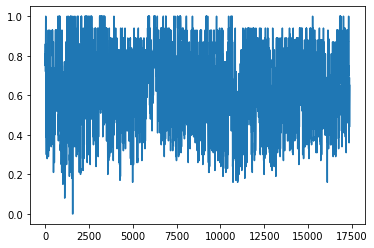

In [35]:
plt.plot(df['hum'])

In [36]:
scaler = StandardScaler()

In [41]:
train_set[['temp', 'hum', 'windspeed']] = scaler.fit_transform(train_set[['temp', 'hum', 'windspeed']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [42]:
test_set[['temp', 'hum', 'windspeed']] = scaler.fit_transform(test_set[['temp', 'hum', 'windspeed']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


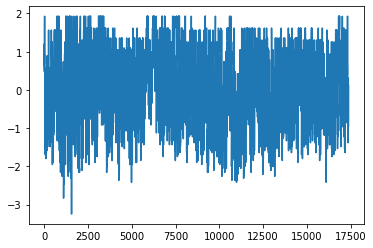

In [44]:
plt.plot(train_set['hum'])

In [45]:
train_set.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
1,1,0,1,1,0,6,0,1,-1.440143,0.892500,-1.55267,40,0.041667
2,1,0,1,2,0,6,0,1,-1.440143,0.892500,-1.55267,32,0.083333
4,1,0,1,4,0,6,0,1,-1.336557,0.633846,-1.55267,1,0.166667
6,1,0,1,6,0,6,0,1,-1.440143,0.892500,-1.55267,2,0.250000
7,1,0,1,7,0,6,0,1,-1.543729,1.202885,-1.55267,3,0.291667


In [46]:
display_scores(train_set.temp), display_scores(test_set.temp)

Scores:  1       -1.440143
2       -1.440143
4       -1.336557
6       -1.440143
7       -1.543729
           ...   
17372   -1.232972
17373   -1.232972
17374   -1.232972
17376   -1.232972
17378   -1.232972
Name: temp, Length: 12165, dtype: float64
Mean:  1.6589552036519725e-15
Standard deviation:  1.000041104054927
Scores:  0       -1.330352
3       -1.330352
5       -1.330352
8       -1.330352
14      -0.180288
           ...   
17354   -1.539455
17355   -1.644006
17367   -1.330352
17375   -1.225801
17377   -1.225801
Name: temp, Length: 5214, dtype: float64
Mean:  -2.9938119919888186e-15
Standard deviation:  1.0000959094616857


(None, None)

In [47]:
train_features = train_set.drop('cnt', axis=1)
train_target = train_set['cnt'] 

In [49]:
train_target

1         40
2         32
4          1
6          2
7          3
        ... 
17372    164
17373    122
17374    119
17376     90
17378     49
Name: cnt, Length: 12165, dtype: int64

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [52]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [68]:
dt_cvscore = -cross_val_score(dec_reg, train_features, train_target, cv=10, scoring="neg_mean_absolute_error")
dt_cvscore

array([42.94494659, 50.37222679, 36.95891537, 44.26211997, 46.99589154,
       71.98026316, 58.19901316, 48.87417763, 50.84868421, 96.46217105])

In [69]:
display_scores(dt_cvscore)

Scores:  [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean:  54.7898409457034
Standard deviation:  16.563759407187572


In [66]:
dt_mse_score = np.sqrt(-cross_val_score(dec_reg, train_features, train_target, cv=10, scoring="neg_mean_squared_error"))

In [67]:
display_scores(dt_mse_score)

Scores:  [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean:  88.0801278896052
Standard deviation:  24.927341207369675


In [70]:
# Linear Regression

lin_reg = LinearRegression()

In [71]:
lr_mae_scores = -cross_val_score(lin_reg, train_features, train_target, cv=10, scoring="neg_mean_absolute_error")

In [72]:
display_scores(lr_mae_scores)

Scores:  [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean:  110.43241256942326
Standard deviation:  31.426965705295256


In [73]:
lr_mse_score = np.sqrt(-cross_val_score(lin_reg, train_features, train_target, cv=10, scoring="neg_mean_squared_error"))

In [74]:
display_scores(lr_mse_score)

Scores:  [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean:  141.19022901181864
Standard deviation:  37.555650759195345


In [76]:
# Random Forest Regressor

In [77]:
forest_reg = RandomForestRegressor()

In [78]:
rf_mae_score = -cross_val_score(forest_reg, train_features, train_target, cv=10, scoring="neg_mean_absolute_error")
display_scores(rf_mae_score)

Scores:  [35.48086278 33.93872638 28.9835415  32.066212   36.19552999 57.26208059
 41.36421875 41.23574836 37.67111842 86.53004112]
Mean:  43.07280798744756
Standard deviation:  16.22762305780447


In [80]:
rf_mse_score = np.sqrt(-cross_val_score(forest_reg, train_features, train_target, cv=10, scoring="neg_mean_squared_error"))
display_scores(rf_mse_score)

Scores:  [ 46.74248035  56.08619642  44.32832736  52.6386123   60.25307349
  94.39220209  66.0560066   65.58969244  61.87565595 134.31880052]
Mean:  68.22810475293889
Standard deviation:  25.67384592016256


In [84]:
#Fine_Tuning  GridSearchCV
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = [
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth':[15, 28]},
]

In [85]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

In [86]:
grid_search

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [87]:
grid_search.fit(train_features, train_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [88]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
grid_search.best_params_

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}

In [94]:
feature_importances = grid_search.best_estimator_.feature_importances_
final_model = grid_search.best_estimator_
print(feature_importances)
print(final_model)

[0.0043176  0.0056876  0.0055746  0.58690665 0.00224032 0.0176482
 0.0673997  0.01686667 0.09772825 0.03093622 0.00907065 0.15562355]
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [91]:
feature_importances

array([0.0043176 , 0.0056876 , 0.0055746 , 0.58690665, 0.00224032,
       0.0176482 , 0.0673997 , 0.01686667, 0.09772825, 0.03093622,
       0.00907065, 0.15562355])

In [93]:
x_test = test_set.drop('cnt', axis=1)
y_test = test_set['cnt']

In [96]:
test_set['prediction_test'] = final_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,prediction_test
0,1,0,1,0,0,6,0,1,-1.330352,0.954772,-1.556911,16,0.000000,35.506667
3,1,0,1,3,0,6,0,1,-1.330352,0.642311,-1.556911,13,0.125000,10.433333
5,1,0,1,5,0,6,0,2,-1.330352,0.642311,-0.828806,1,0.208333,4.380000
8,1,0,1,8,0,6,0,1,-1.330352,0.642311,-1.556911,8,0.333333,23.173333
14,1,0,1,14,0,6,0,2,-0.180288,0.486081,0.747672,106,0.583333,122.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,-1.539455,-0.607533,0.262539,49,723.083333,37.973333
17355,1,1,12,0,0,1,1,1,-1.644006,-0.399226,0.019567,34,723.125000,38.406667
17367,1,1,12,12,0,1,1,2,-1.330352,-0.347149,0.019567,224,723.625000,164.013333
17375,1,1,12,20,0,1,1,2,-1.225801,-0.138842,-0.222593,89,723.958333,95.566667


In [98]:
mse = mean_squared_error(y_test, test_set.prediction_test)

In [100]:
final_mse = np.sqrt(mse)

In [101]:
final_mse

39.27636216320493

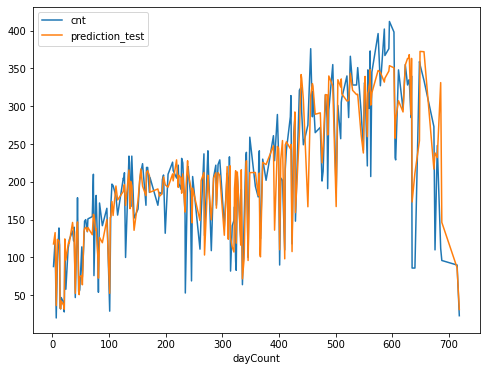

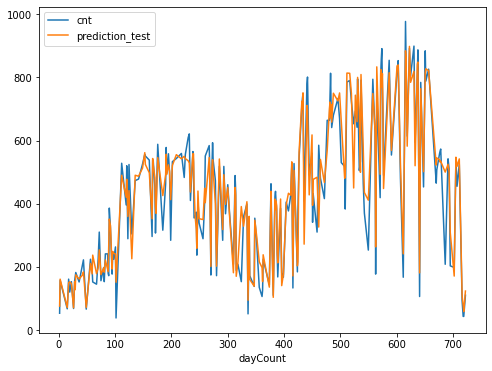

In [102]:
#plot
times = [9, 18]
for time in times:
  fig = plt.figure(figsize=(8, 6))
  fig.clf()
  ax = fig.gca()
  test_set_freg_time = test_set[test_set.hr == time]
  test_set_freg_time.plot(kind='line', x='dayCount', y='cnt', ax=ax)
  test_set_freg_time.plot(kind='line', x='dayCount', y='prediction_test', ax=ax)
  plt.show()